#  토픽 모델링- 20 뉴스그룹
- 토픽 모델링이란 문서 집합 속에 숨어 있는 주제를 찾아내는 것
- 사람이 수행한은 토픽 모델링에 반해 머신러닝 기반 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출함
- 토픽 모델링에 자주 사용되는 기법은 LSA - Latent Semantic Analysis와 LDA - Latent Dirichlet Allocation이 있음

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 
# 8개 주제를 추출
cats=['rec.motorcycles','rec.sport.baseball','comp.graphics',
     'comp.windows.x','talk.politics.mideast','soc.religion.christian',
     'sci.electronics','sci.med']
news_df=fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'),
                                               categories=cats,random_state=0)
# LDA는 Count 기반의 벡터화만 적용함
count_vect=CountVectorizer(max_df=0.95,max_features=1000,min_df=2,
                          stop_words='english',ngram_range=(1,2))
feat_vect=count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape',feat_vect.shape)

CountVectorizer Shape (7862, 1000)


In [4]:
lda=LatentDirichletAllocation(n_components=8,random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [5]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [7]:
def display_topics(model,feature_names,no_top_words):
    for topic_index,topic in enumerate(model.components_):
        print('Topic',topic_index)
        # components_array에서 가장 값이 큰 순으로 정렬했을 때 그 값의 array를 반환
        topic_word_indexes=topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        # top_indexes대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat=' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names=count_vect.get_feature_names_out()
# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda,feature_names,15)

Topic 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic 1
don just like know people said think time ve didn right going say ll way
Topic 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic 3
like know don think use does just good time book read information people used post
Topic 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic 7
use dos thanks windows using window does display help like problem server need know run


- topic 0의 경우 명확하지 않고 일반적인 단어가 주를 이룸
- topic 1의 경우 명확하게 컴퓨터 그래픽스 영역의 주제어가 추출됨
- topic 2의 경우 기독교 관련 주제어
- topic 3의 경우 의학 관련 주제어
- topic 4의 경우 윈도우 운영체제와 관련된 주제어
- topic 5의 경우 일반적인 단어로 주제어 추출
- topic 6의 경우 중동 분쟁 등에 관련된 주제어 추출
- topic 7의 경우 애매하지만 윈도우 운영체제와 관련된 주제어가 일부 추출됨

간단한 문서에 대해 서로간의 문서 유사도를 코사인 유사도 기반으로 구해봄

In [12]:
import numpy as np
def cos_similarity(v1,v2):
    dot_product=np.dot(v1,v2)
    l2_norm=(np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
    similarity=dot_product/l2_norm
    return similarity

from sklearn.feature_extraction.text import TfidfVectorizer
doc_list=['if you take the blue pill,  the story ends',
         'if you take the red pill, you stay in Wonderland',
         'if you take the red pill, I show you how deep the rabbit hole goes']

In [13]:
tfidf_vect_simple=TfidfVectorizer()
feature_vect_simple=tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple)

  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (1, 16)	0.39624495215024286
  (1, 7)	0.39624495215024286
  (1, 12)	0.39624495215024286
  (1, 10)	0.3013544995034864
  (1, 8)	0.2340286519091622
  (1, 15)	0.2340286519091622
  (1, 14)	0.2340286519091622
  (1, 17)	0.4680573038183244
  (1, 6)	0.2340286519091622
  (2, 3)	0.3098560092999078
  (2, 4)	0.3098560092999078
  (2, 9)	0.3098560092999078
  (2, 1)	0.3098560092999078
  (2, 5)	0.3098560092999078
  (2, 11)	0.3098560092999078
  (2, 10)	0.23565348175165166
  (2, 8)	0.1830059506093466
  (2, 15)	0.3660119012186932
  (2, 14)	0.1830059506093466
  (2, 17)	0.3660119012186932
  (2, 6)	0.1830059506093466


In [14]:
print(feature_vect_simple.shape)

(3, 18)


In [17]:
# TFidfVectorizer 로 transform 한 결과는 희소행렬이므로 밀집행렬로 변환
feature_vect_dense=feature_vect_simple.todense()
# 첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect2=np.array(feature_vect_dense[1]).reshape(-1,)
# 첫번째 문장과 두번째 문장의 피처 벡터로 두개 문장의 코사인 유사도 추출
similarity_simple=cos_similarity(vect1,vect2)
print(similarity_simple)

0.40207758214950134


In [18]:
# 첫번째 문장과 세번째 문장의 피처 벡터 추출
vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect3=np.array(feature_vect_dense[2]).reshape(-1,)
# 첫번째 문장과 세번째 문장의 피처 벡터로 두개 문장의 코사인 유사도 추출
similarity_simple=cos_similarity(vect1,vect3)
print(similarity_simple)

# 두번째 문장과 세번째 문장의 피처 벡터 추출
vect2=np.array(feature_vect_dense[1]).reshape(-1,)
vect3=np.array(feature_vect_dense[2]).reshape(-1,)
# 두번째 문장과 세번째 문장의 피처 벡터로 두개 문장의 코사인 유사도 추출
similarity_simple=cos_similarity(vect2,vect3)
print(similarity_simple)

0.4042504477594862
0.45647296026166395


In [19]:
# 맨 처음의 1 제외하기
similarity_simple_pair=cosine_similarity(feature_vect_simple[0],feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [20]:
# 두번째 문서와 첫번째 세번째 문서의 유사도 측정
similarity_simple_pair=cosine_similarity(feature_vect_simple[0],feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [21]:
# 쌍으로 코사인 유사도 값 제공
# 모든 개별 문서에 쌍으로 코사인 유사도 값 계산
similarity_simple_pair=cosine_similarity(feature_vect_simple,feature_vect_simple[1:])
print(similarity_simple_pair)
print(similarity_simple_pair.shape)

[[0.40207758 0.40425045]
 [1.         0.45647296]
 [0.45647296 1.        ]]
(3, 2)


Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [26]:
# 데이터 세트를 새롭게 Dataframe으로 로드하고 문서 군집화 적용
import pandas as pd
import glob,os
from sklearn.cluster import KMeans
path=r"C:\Users\MYCOM\data\topic"
all_files = glob.glob(os.path.join(path,"*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    filename_list.append(filename)
    opinion_text.append(df.to_string())

from nltk.stem import WordNetLemmatizer
def LemNormalize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in text.split()]
    return ' '.join(tokens)
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect=TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                          ngram_range=(1,2),min_df=0.05,max_df=0.85)
feature_vect=tfidf_vect.fit_transform(document_df['opinion_text'])

C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [28]:
km_cluster=KMeans(n_clusters=3,max_iter=10000,random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_
document_df['cluster_label']=cluster_label

C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
# 해당 문서 군집화는 전자제품, 호텔, 자동차를 주제로 군집화 됨
# 이 중 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서간의 유사도를 알아보고자 함
# 문서릍 피처벡터화해 변환하면 문서 내 단어에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화됨
# 이를 위해 호텔을 주제로 군집화된 데이터를 먼저 추출하고 이 데이터에 해당하는 tfidf의 데이터를 추추람
from sklearn.metrics.pairwise import cosine_similarity
# cluster=1인 데이터는 호텔로 군집화된 데이터임
hotel_indexes=document_df[document_df['cluster_label']==1].index
print('호텔로 군집화된 문서들의 데이터프레임',hotel_indexes)
# 호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시
comp_docname=document_df.iloc[hotel_indexes[0]]['filename']
print(comp_docname)
# document_df에서 추출한 index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
# 이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정
similarity_pair=cosine_similarity(feature_vect[hotel_indexes[0]],feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 데이터프레임 Int64Index([1, 13, 14, 15, 20, 21, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
bathroom_bestwestern_hotel_sfo
[[1.         0.28329664 0.22703961 0.2355389  0.31283466 0.40329423
  0.27475301 0.66182111 0.50718393 0.70219945 0.40951239 0.47355721
  0.37188293 0.25990141 0.25206913]]


<AxesSubplot:xlabel='similarity', ylabel='filename'>

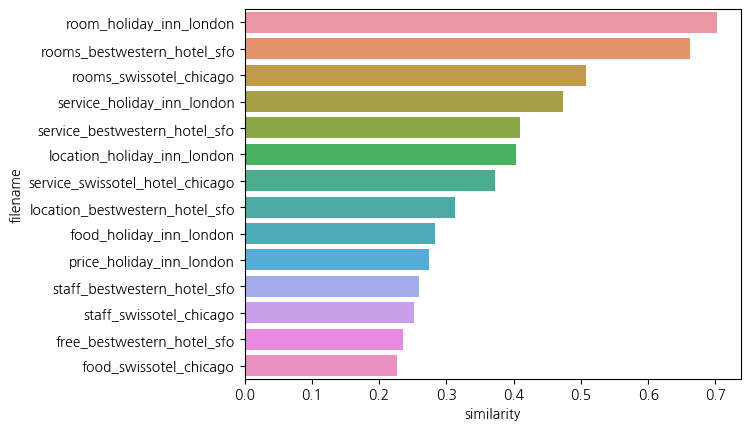

In [39]:
# 단순히 숫자로만 표시해서는 직관적으로 문서가 어느 정도 유사도를 가지는지 이해하기 어려움
# 유사도가 높은 순으로 정렬하고 이를 시각화 진행 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기자신은 제외
sorted_index=similarity_pair.argsort()[:,::-1]
sorted_index=sorted_index[:,1:]
# 유사도가 큰순으로 추출해 재정렬
hotel_sorted_indexes=hotel_indexes[sorted_index.reshape(-1)]
# 유사도가 큰순으로 재정렬하되 자기 자신은 제외
hotel_1_sim_value=np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value=hotel_1_sim_value[1:]
# 유사도가 큰순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대그래프로 시각화
hotel_1_sim_df=pd.DataFrame()
hotel_1_sim_df['filename']=document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity']=hotel_1_sim_value

sns.barplot(x='similarity',y='filename',data=hotel_1_sim_df)

## 한글 텍스트 처리- 네이버 영화 평점 감정 분석
- 한글 NLP 처리의 어려움
> 일반적으로 한글 처리는 영어 등의 라틴어보다 띄어쓰기와 다양한 조사 때문에 어려움
- KoNLPy 소개
> 파이썬의 대표적인 한글 형태소 패키지로 형태소의 사전적인 의미는 단어로서 이미를 가지는 최소 단위임. 형태소 분석이란 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업을 일반적으로 지칭함

In [41]:
train_df=pd.read_csv("C:/Users/MYCOM/Downloads/ratings_train.txt",sep='\t')
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [42]:
# 긍부정 감성 분석
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [44]:
# 문자가 아닌 숫자의 경우 단어적인 의미 부족하므로 공백으로 변환
# 테스트 데이터 세트에도 동일한 데이터 가공 수행 
import re
train_df=train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경
train_df['document']=train_df['document'].apply(lambda x: re.sub(r'\d+',' ',x))
# 테스트 데이터 세트를 로딩하고 동일하게
test_df=pd.read_csv("C:/Users/MYCOM/Downloads/ratings_test.txt",sep='\t')
test_df=test_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경
test_df['document']=test_df['document'].apply(lambda x: re.sub(r'\d+',' ',x))
#id 칼럼 삭제
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [50]:
# 단어 벡터화
# 이때 먼저 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화
'''
from konlpy.tag import Twitter

twitter=Twitter()

def tw_tokenizer(text):
    # 입력인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태 반환
        tokens_ko = twitter.morphs(text)
        return tokens_ko

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

#LogisticRegression를 이용하여 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state=0)

params = {'C':[1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, grid_cv.best_score_)

'''

"\nfrom konlpy.tag import Twitter\n\ntwitter=Twitter()\n\ndef tw_tokenizer(text):\n    # 입력인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태 반환\n        tokens_ko = twitter.morphs(text)\n        return tokens_ko\n\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import GridSearchCV\n\n\ntfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)\ntfidf_vect.fit(train_df['document'])\ntfidf_matrix_train = tfidf_vect.transform(train_df['document'])\n\n#LogisticRegression를 이용하여 감성 분석 분류 수행.\nlg_clf = LogisticRegression(random_state=0)\n\nparams = {'C':[1,3.5,4.5,5.5,10]}\ngrid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)\ngrid_cv.fit(tfidf_matrix_train, train_df['label'])\nprint(grid_cv.best_params_, grid_cv.best_score_)\n\n"